In [94]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from matplotlib import pyplot as plt

In [95]:
circuit = QuantumCircuit(3,3)

# circuit.x(0) # optional, we want to transfer state 1 in this example

circuit.barrier()

circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

In [96]:
%matplotlib inline

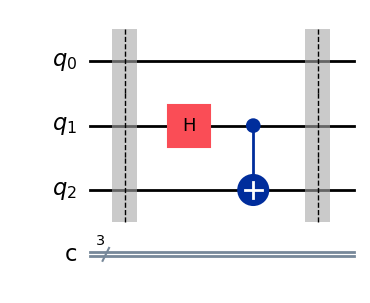

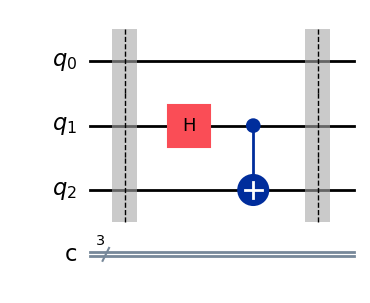

In [97]:
circuit.draw(output='mpl')

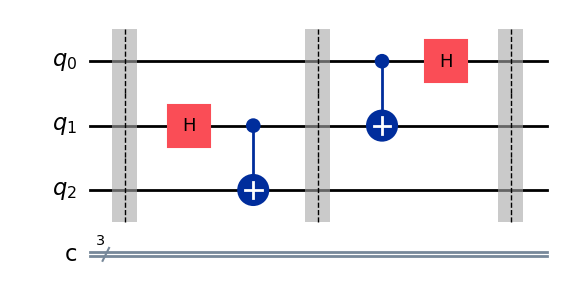

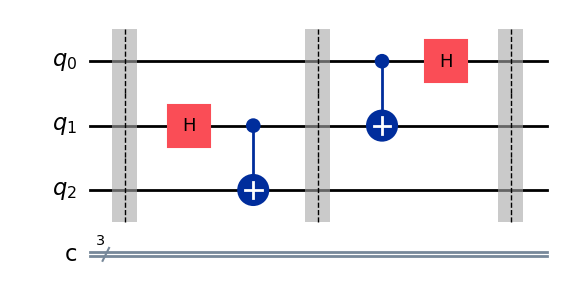

In [98]:
circuit.cx(0,1)
circuit.h(0)

circuit.barrier()
circuit.draw(output='mpl')

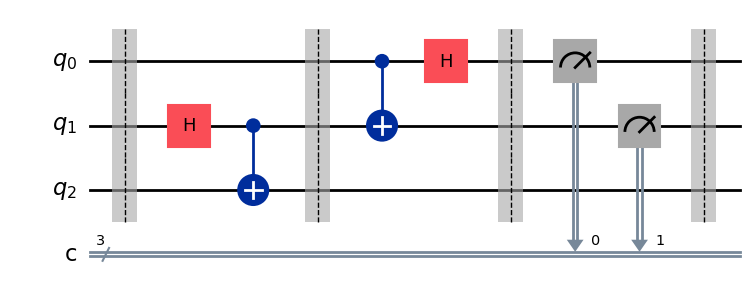

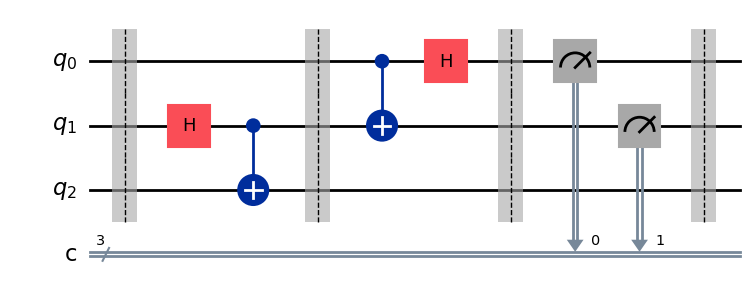

In [99]:
circuit.measure([0, 1], [0, 1])

circuit.barrier()
circuit.draw(output='mpl')

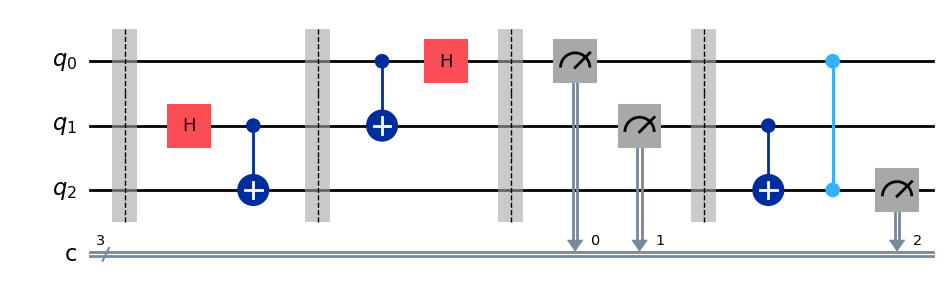

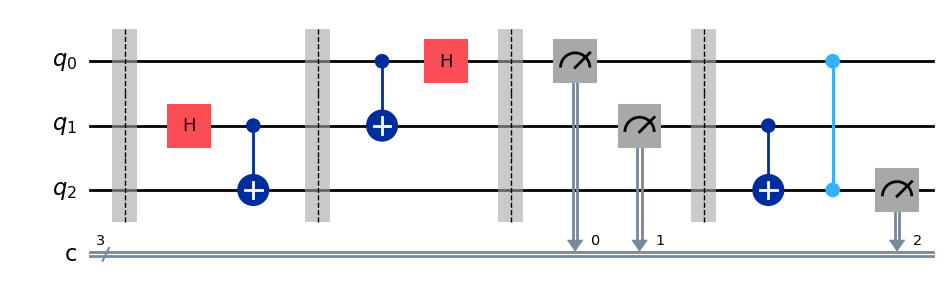

In [100]:
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.measure([2], [2])
circuit.draw(output='mpl')

In [101]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
print("Backend:", backend.name)
# simulator = Aer.get_backend('qasm_simulator')
# result = execute(circuit, backend=simulator, shots=1024).result()
# from qiskit.visualization import plot_histogram
# plot_histogram(result.get_counts(circuit))

Backend: ibm_torino


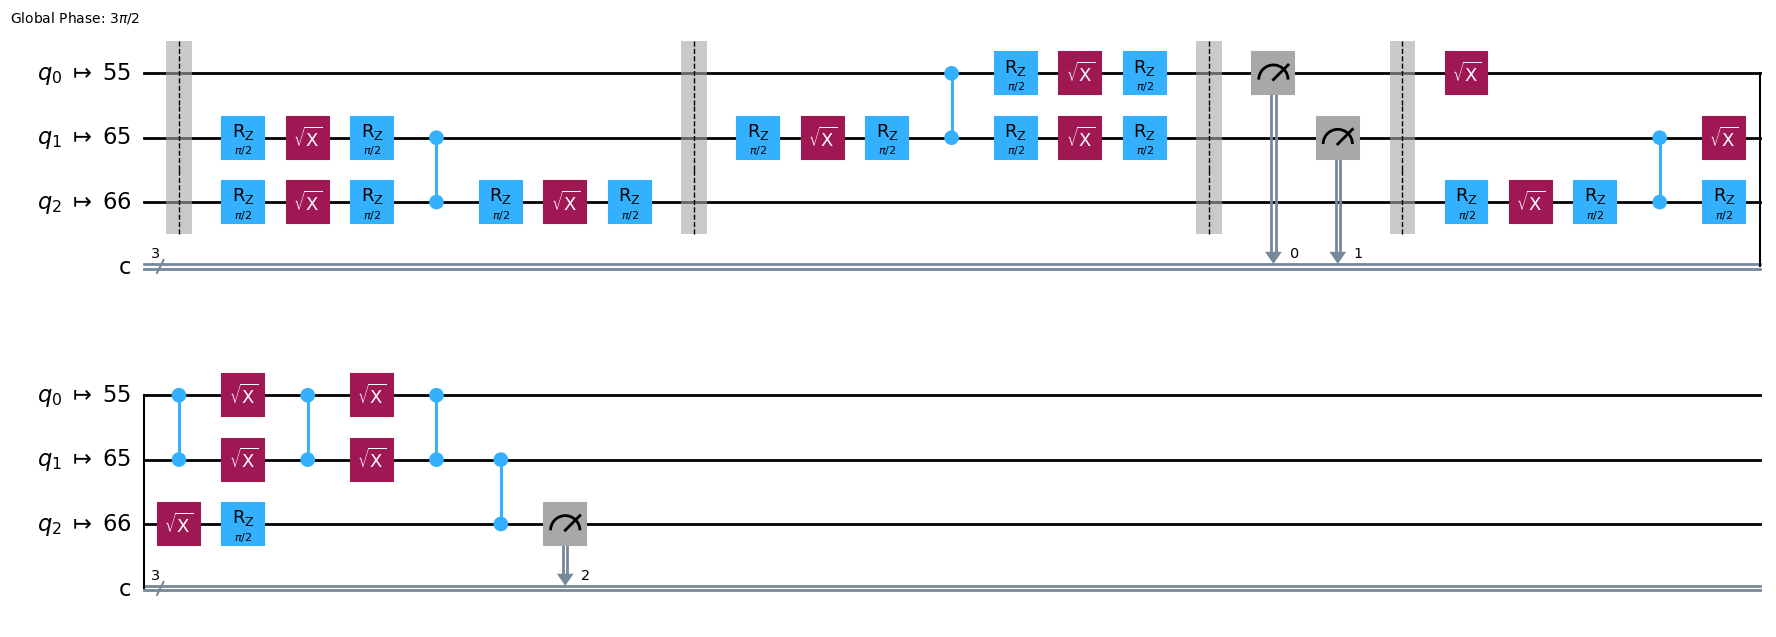

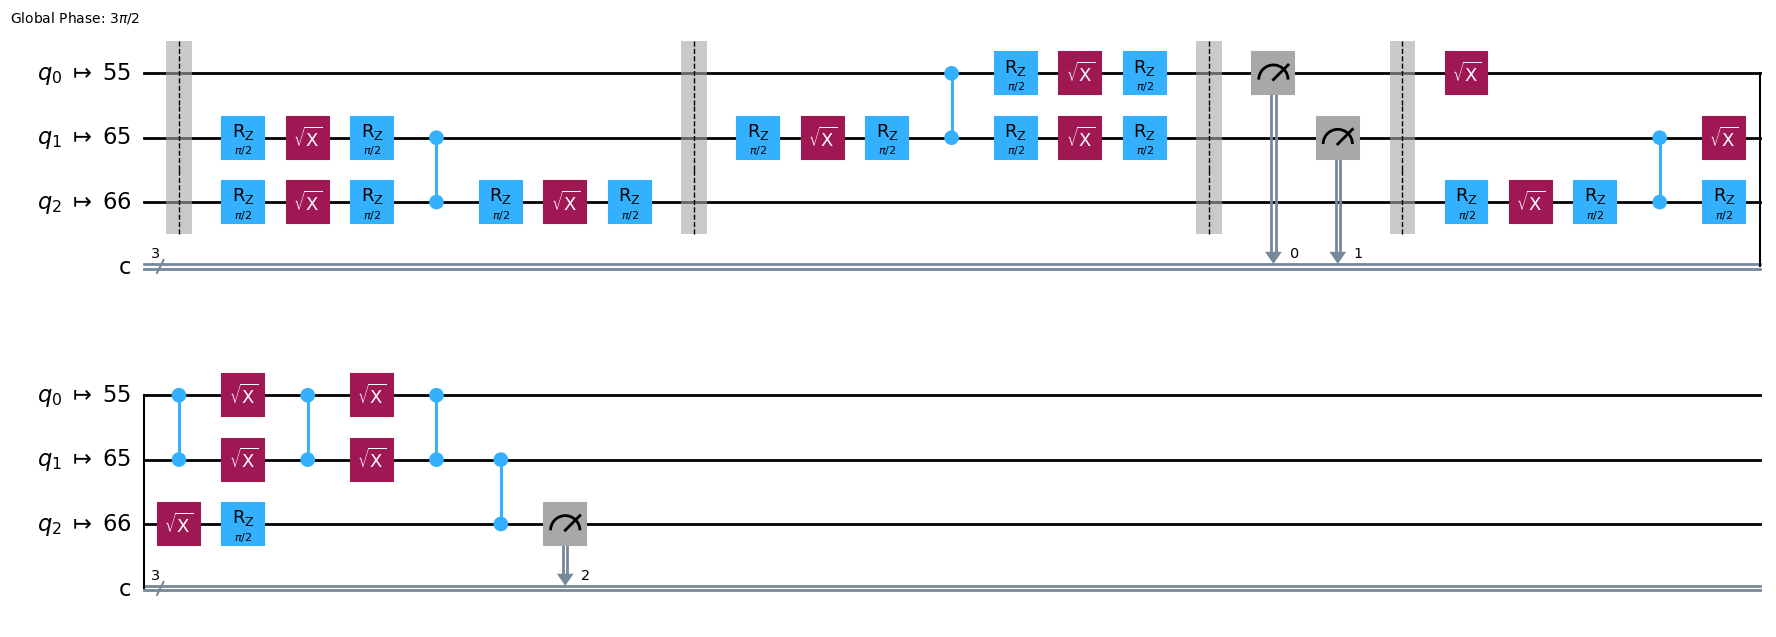

In [102]:
isa_circuit = pm.run(circuit)
isa_circuit.draw("mpl", idle_wires=False)

In [103]:
sampler = Sampler(mode=backend)
# One pub, with one circuit to run against five different observables.
job = sampler.run([isa_circuit], shots=1024)

In [104]:
result = job.result()

print("Result:", result)

Result: PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-11-08 02:17:24', stop='2025-11-08 02:17:25', size=1024>)])}, 'version': 2})


In [105]:
from qiskit.visualization import plot_histogram
qd = result[0].data.c.get_counts()
print(qd)

{'011': 231, '000': 256, '001': 260, '010': 248, '111': 12, '100': 3, '110': 10, '101': 4}


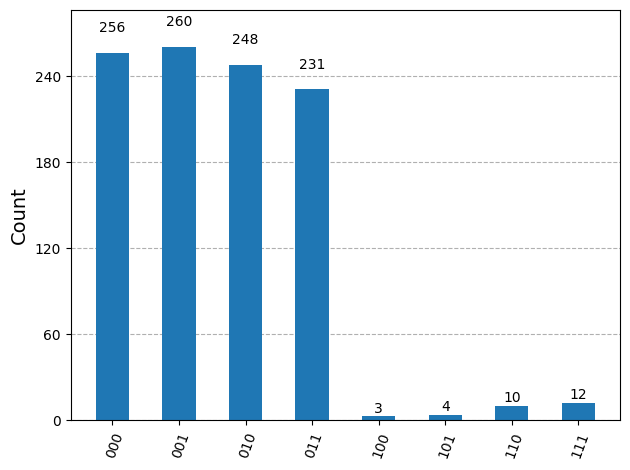

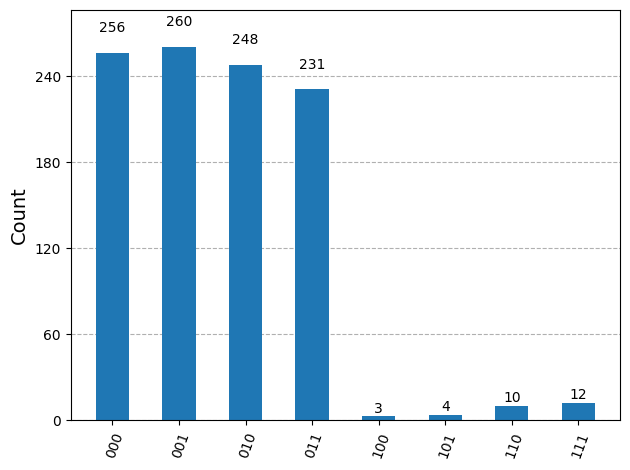

In [106]:
plot_histogram(qd)